In [1]:
from pathlib import Path
from glob import glob

from tqdm.notebook import tqdm
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pandas as pd

: 

In [6]:
data_path = Path('/local/home/lhauptmann/CV4A/data')
data_raw_path = data_path / 'raw'
data_processed_path = data_path / 'processed'
data_split_path = data_raw_path / 'FieldIds.csv'
azcopy_path = '/local/home/lhauptmann/CV4A//local/home/lhauptmann/CV4A/data/azcopy_linux_amd64_10.28.0'

In [93]:
def plot_sentinel2_image(image_data, title="", ax = None):
    """
    Plots Sentinel-2 image data (RGB composite or individual bands).

    Parameters:
        - image_data (numpy array): The image data (RGB composite or individual band).
        - title (str): The title of the plot.
        - show_colorbar (bool): Whether to show the colorbar. Default is True.
    """
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image_data, cmap='viridis')
    

    ax.set_title(title, fontsize=14)
    ax.axis('off')  # Turn off axes for better presentation


In [123]:
from torchgeo import datasets
import os
os.environ["PATH"] = f"{azcopy_path}:" + os.environ["PATH"]

dataset = datasets.CV4AKenyaCropType(root=data_path/"raw", download=True, chip_size = 224, stride=16)

split = pd.read_csv(data_split_path)
test_id = split["test"].dropna().values
train_id = split["train"].dropna().values

In [133]:
sample = dataset[300]
print(sample.keys(), sample["image"].shape)
print(sample["field_ids"].unique(), sample["mask"].unique(), sample["tile_index"].unique())

dict_keys(['image', 'mask', 'field_ids', 'tile_index', 'x', 'y']) torch.Size([13, 13, 224, 224])
tensor([   0, 1469, 1470, 1689, 1748, 1749, 1750, 1808, 2072, 2345, 2928, 2929,
        3180, 3220, 3340, 4034, 4035, 4743, 4775], dtype=torch.int32) tensor([0, 1, 2, 4, 5], dtype=torch.uint8) tensor([0])


torch.Size([13, 13, 224, 224])


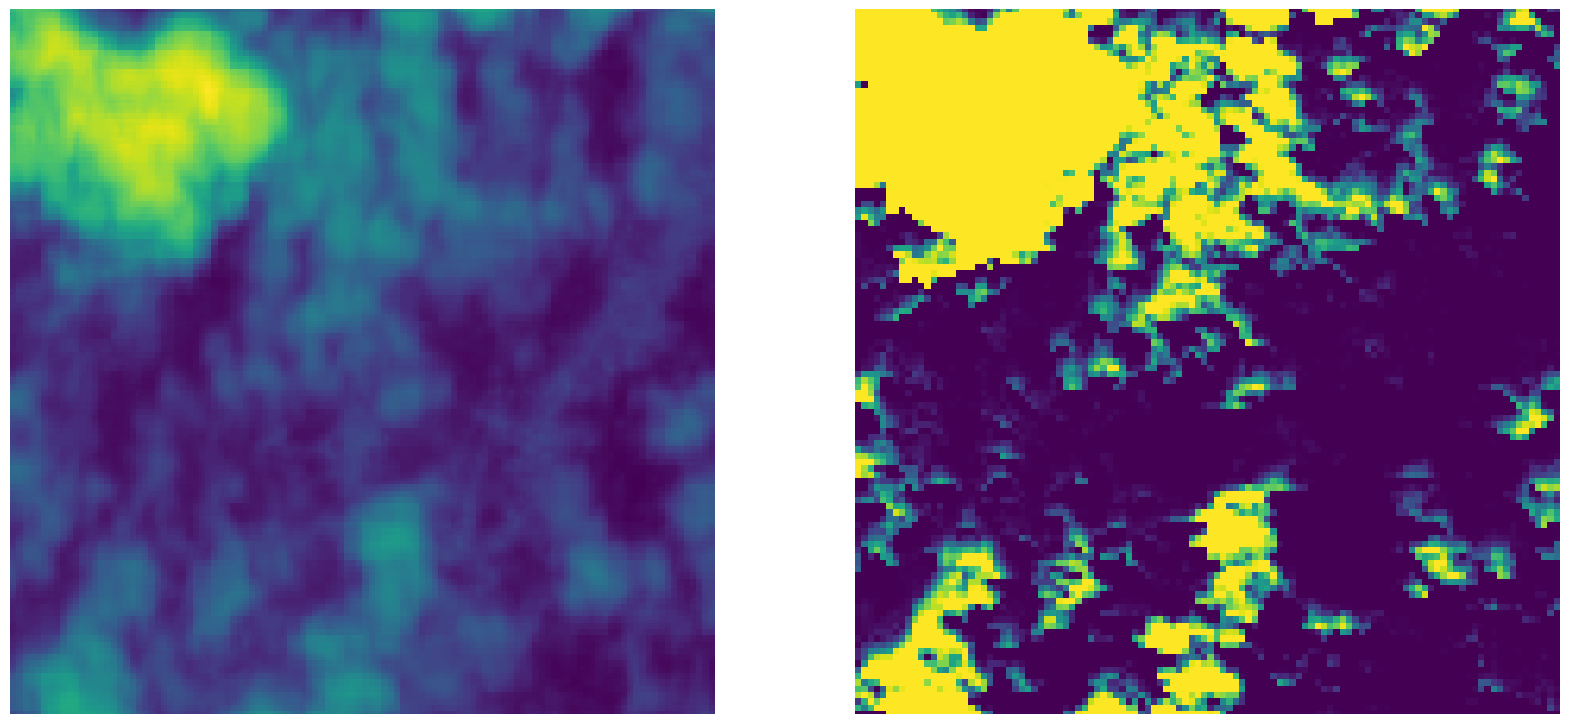

In [134]:
# Image consists of [n_timepoints, n_bands, height, width]
print(sample["image"].shape)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
timepoint = 3
plot_sentinel2_image(sample["image"][timepoint,0:-1,...].mean(dim=0), ax = axes[0])
plot_sentinel2_image(sample["image"][timepoint,-1,...], ax = axes[1])

In [119]:
from torchgeo import models
model = models.resnet50(weights=models.ResNet50_Weights.SENTINEL2_ALL_DECUR)

In [129]:
output = model(sample["image"])
output.shape

torch.Size([13, 1000])

In [ ]:
output